In [1]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))

In [3]:
%matplotlib inline

In [17]:
shp_path = "/Users/dvf/Documents/BGRI2011_1706/BGRI2011_1706.shp"
sf = shp.Reader(shp_path)

In [18]:
len(sf.shapes())

1417

In [6]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df


In [19]:
#df = read_shapefile(sf)
df.shape

(1500, 128)

In [20]:
df.sample(5)

,ANO,GEO_COD,GEO_COD_DSG,NIVEL,NIVEL_DSG,N_EDIFICIOS_CLASSICOS,N_EDIFICIOS_CLASSICOS_1OU2,N_EDIFICIOS_CLASSICOS_ISOLADOS,N_EDIFICIOS_CLASSICOS_GEMIN,N_EDIFICIOS_CLASSICOS_EMBANDA,...,N_IND_RESID_DESEMP_PROC_EMPRG,N_IND_RESID_EMPREGADOS,N_IND_RESID_PENS_REFORM,N_IND_RESID_SEM_ACT_ECON,N_IND_RESID_EMPREG_SECT_PRIM,N_IND_RESID_EMPREG_SECT_SEQ,N_IND_RESID_EMPREG_SECT_TERC,N_IND_RESID_ESTUD_MUN_RESID,N_IND_RESID_TRAB_MUN_RESID,Unnamed: 127
1286,2011,'17063000111,,8,Subsecção,1,1,1,0,0,...,0,2,0,0,0,1,1,0,2,NaN
1084,2011,'17062600216,,8,Subsecção,7,7,7,0,0,...,0,5,5,8,2,1,2,2,4,NaN
1469,2011,'17063400236,,8,Subsecção,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
847,2011,'17062000116,,8,Subsecção,2,2,2,0,0,...,0,0,2,3,0,0,0,0,0,NaN
870,2011,'17062000139,,8,Subsecção,15,15,5,0,10,...,0,1,5,6,1,0,0,0,1,NaN


In [82]:
def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

In [83]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [53]:
def plot_map2(id, sf, x_lim = None, y_lim = None, figsize=(11,9)):
    '''
    Plot map with lim coordinates
    '''
   
    plt.figure(figsize = figsize)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat, 'r', linewidth=3) 
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

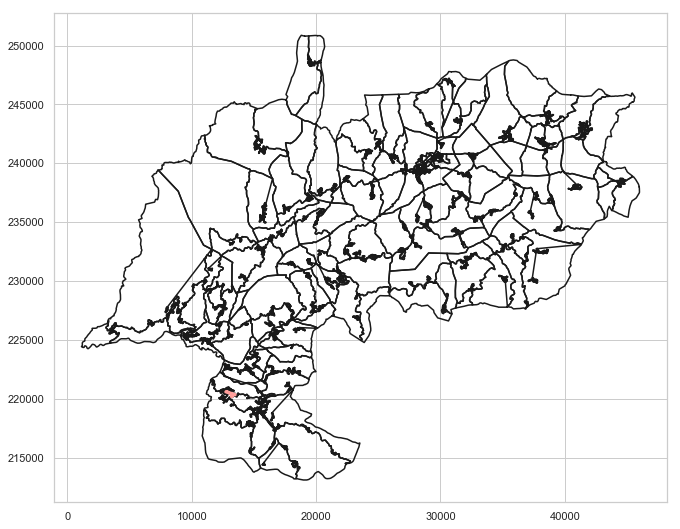

In [47]:
plot_map2(25, sf)

In [54]:
def plot_map_fill(id, sf, x_lim = None, 
                          y_lim = None, 
                          figsize = (11,9), 
                          color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    ax.fill(x_lon,y_lat, color)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

<Figure size 792x648 with 0 Axes>

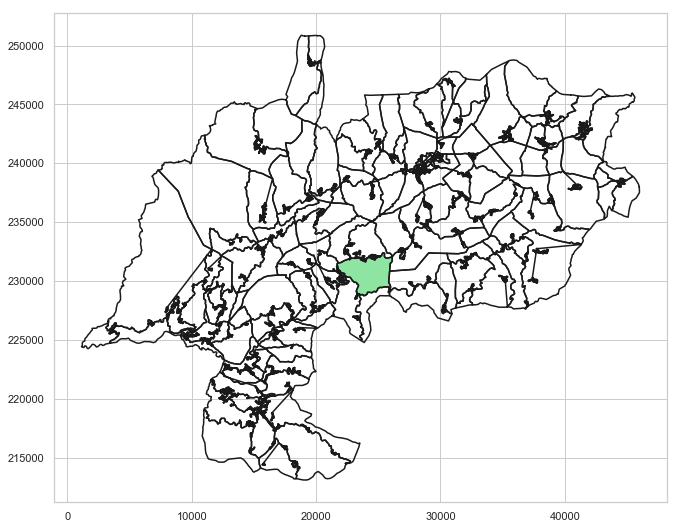

In [48]:
plot_map_fill(0, sf, color='g')

In [55]:
def plot_map_fill_multiples_ids(title, comuna, sf, 
                                               x_lim = None, 
                                               y_lim = None, 
                                               figsize = (11,9), 
                                               color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color)
             
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, id, fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 6: invalid continuation byte

<Figure size 792x648 with 0 Axes>

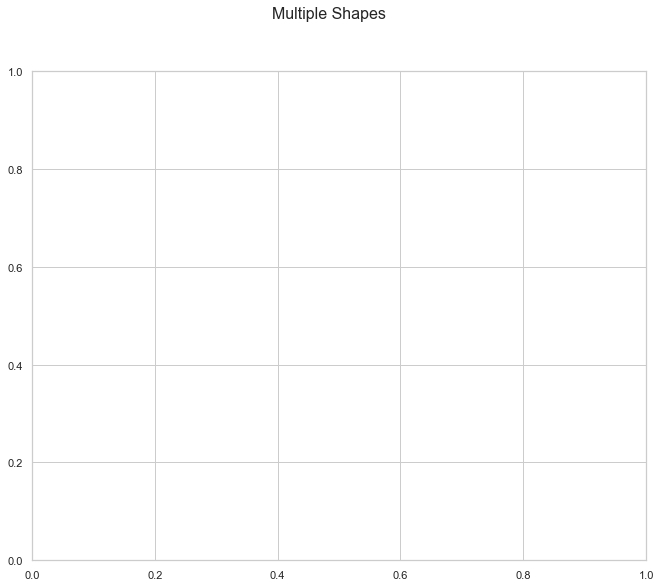

In [139]:
comuna_id = [0, 1, 2, 3, 4, 5, 6]
plot_map_fill_multiples_ids("Multiple Shapes", 
                            comuna_id, sf, color = 'r')

In [86]:
def plot_comunas_2(sf, title, comunas, color):
    '''
    Plot map with selected comunes, using specific color
    '''
    
    df = read_shapefile(sf)
    comuna_id = []
    for i in comunas:
        comuna_id.append(df[df.NOM_COMUNA == i.upper()]
                         .index.get_values()[0])
    plot_map_fill_multiples_ids(title, comuna_id, sf, 
                                       x_lim = None, 
                                       y_lim = None, 
                                       figsize = (11,9), 
                                       color = color);

In [22]:
import geopandas as gpd

fp = "/Users/dvf/Documents/BGRI2011_1706/BGRI2011_1706.shp"

map_df = gpd.read_file(fp)

# check data type so we can see that this is not a normal dataframe, but a GEOdataframe



map_df.head()

Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not

Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not

Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not

Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not

Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not

ValueError: Null geometry supports no operations

ValueError: Null geometry supports no operations

In [15]:
import geopandas
import matplotlib.pyplot as plt

df = gpd.read_file("/Users/dvf/Documents/BGRI2011_1706/BGRI2011_1706.shp")

df


Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not

Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not

Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not

Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not

ValueError: Null geometry supports no operations

ValueError: Null geometry supports no operations

ValueError: Null geometry has no type

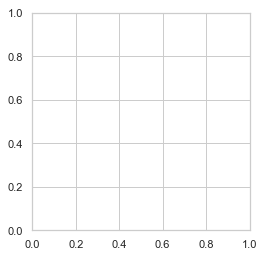

In [10]:
import descartes
map_df.plot()

In [16]:
df = pd.read_csv("/Users/dvf/Documents/BGRI2011_1706/BGRI2011_1706.csv", header=0, sep=";", encoding = "ISO-8859-1") 
#tive que mudar encoding
df.head()

,ANO,GEO_COD,GEO_COD_DSG,NIVEL,NIVEL_DSG,N_EDIFICIOS_CLASSICOS,N_EDIFICIOS_CLASSICOS_1OU2,N_EDIFICIOS_CLASSICOS_ISOLADOS,N_EDIFICIOS_CLASSICOS_GEMIN,N_EDIFICIOS_CLASSICOS_EMBANDA,...,N_IND_RESID_DESEMP_PROC_EMPRG,N_IND_RESID_EMPREGADOS,N_IND_RESID_PENS_REFORM,N_IND_RESID_SEM_ACT_ECON,N_IND_RESID_EMPREG_SECT_PRIM,N_IND_RESID_EMPREG_SECT_SEQ,N_IND_RESID_EMPREG_SECT_TERC,N_IND_RESID_ESTUD_MUN_RESID,N_IND_RESID_TRAB_MUN_RESID,Unnamed: 127
0,2011,'PT,PT,1,Total Nacional,3544389,3219791,1946604,542393,730794,...,539870,4361187,2339094,3966482,133386,1154709,3073092,1773245,2860521,NaN
1,2011,'1,Continente,2,NUT1,3353610,3035969,1820486,516785,698698,...,515712,4150252,2257145,3782538,121055,1115357,2913840,1669455,2697144,NaN
2,2011,'11,Norte,3,NUT2,1209911,1118014,744666,200722,172626,...,207538,1501883,768566,1376384,43023,533848,925012,631487,1008020,NaN
3,2011,'118,Alto Trás-os-Montes,4,NUT3,127220,123194,66466,26515,30213,...,6669,68441,63100,103862,7725,13567,47149,29828,58694,NaN
4,2011,'1706,Montalegre,5,Municipio,10157,10036,5656,2176,2204,...,246,3098,3866,6049,692,604,1802,1235,2741,NaN


In [60]:
#df = df[['N_EDIFICIOS_CLASSICOS','N_IND_RESID_EMPREGADOS']]
df.head()

,ANO,GEO_COD,GEO_COD_DSG,NIVEL,NIVEL_DSG,N_EDIFICIOS_CLASSICOS,N_EDIFICIOS_CLASSICOS_1OU2,N_EDIFICIOS_CLASSICOS_ISOLADOS,N_EDIFICIOS_CLASSICOS_GEMIN,N_EDIFICIOS_CLASSICOS_EMBANDA,...,N_IND_RESID_DESEMP_PROC_EMPRG,N_IND_RESID_EMPREGADOS,N_IND_RESID_PENS_REFORM,N_IND_RESID_SEM_ACT_ECON,N_IND_RESID_EMPREG_SECT_PRIM,N_IND_RESID_EMPREG_SECT_SEQ,N_IND_RESID_EMPREG_SECT_TERC,N_IND_RESID_ESTUD_MUN_RESID,N_IND_RESID_TRAB_MUN_RESID,Unnamed: 127
0,2011,'PT,PT,1,Total Nacional,3544389,3219791,1946604,542393,730794,...,539870,4361187,2339094,3966482,133386,1154709,3073092,1773245,2860521,NaN
1,2011,'1,Continente,2,NUT1,3353610,3035969,1820486,516785,698698,...,515712,4150252,2257145,3782538,121055,1115357,2913840,1669455,2697144,NaN
2,2011,'11,Norte,3,NUT2,1209911,1118014,744666,200722,172626,...,207538,1501883,768566,1376384,43023,533848,925012,631487,1008020,NaN
3,2011,'118,Alto Trás-os-Montes,4,NUT3,127220,123194,66466,26515,30213,...,6669,68441,63100,103862,7725,13567,47149,29828,58694,NaN
4,2011,'1706,Montalegre,5,Municipio,10157,10036,5656,2176,2204,...,246,3098,3866,6049,692,604,1802,1235,2741,NaN


In [90]:
# join the geoDF with the cleaned up csv dataframe

merged = map_df.set_index('LUG11DESIG').join(df.set_index('GEO_COD'))
merged.head()

map_df['Fregusias'] = map_df.concat(['DTMN11', 'FR11'], sort=False)

,DTMN11,FR11,SEC11,SS11,BGRI11,LUG11,geometry,ANO,GEO_COD_DSG,NIVEL,...,N_IND_RESID_DESEMP_PROC_EMPRG,N_IND_RESID_EMPREGADOS,N_IND_RESID_PENS_REFORM,N_IND_RESID_SEM_ACT_ECON,N_IND_RESID_EMPREG_SECT_PRIM,N_IND_RESID_EMPREG_SECT_SEQ,N_IND_RESID_EMPREG_SECT_TERC,N_IND_RESID_ESTUD_MUN_RESID,N_IND_RESID_TRAB_MUN_RESID,Unnamed: 127
Aldeia Nova,1706,04,002,39,17060400239,014079,"POLYGON ((31448.45600000024 234073.6604999993,...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aldeia Nova,1706,04,002,38,17060400238,014079,"POLYGON ((32057.70569999982 232866.2488000002,...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aldeia Nova,1706,04,002,37,17060400237,014079,"POLYGON ((31343.29349999968 234168.4321999997,...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aldeia Nova,1706,04,002,36,17060400236,014079,"POLYGON ((31435.61359999981 234223.2511, 31434...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aldeia Nova,1706,04,002,35,17060400235,014079,"POLYGON ((31250.96740000043 234264.2271999996,...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
map_df['Freguesias'] = map_df["DTMN11"] + map_df["FR11"]

In [184]:
map_df['Freguesias']

0       170634
1       170625
2       170626
3       170612
4       170608
5       170608
6       170626
7       170609
8       170626
9       170626
10      170626
11      170612
12      170620
13      170626
14      170626
15      170626
16      170626
17      170626
18      170626
19      170626
20      170626
21      170626
22      170626
23      170626
24      170626
25      170626
26      170626
27      170626
28      170626
29      170607
         ...  
1387    170630
1388    170630
1389    170630
1390    170630
1391    170630
1392    170602
1393    170613
1394    170602
1395    170613
1396    170613
1397    170613
1398    170613
1399    170606
1400    170615
1401    170608
1402    170608
1403    170613
1404    170615
1405    170615
1406    170615
1407    170613
1408    170608
1409    170615
1410    170615
1411    170613
1412    170615
1413    170628
1414    170628
1415    170628
1416    170617
Name: Freguesias, Length: 1417, dtype: object

In [185]:
map_df.head()

,DTMN11,FR11,SEC11,SS11,BGRI11,LUG11,LUG11DESIG,geometry,Fregusias,Freguesias
0,1706,34,002,38,17063400238,999999,Residual,"POLYGON ((26131.41889999993 232084.4857000001,...",1,170634
1,1706,25,001,15,17062500115,014045,Ladrugães,"POLYGON ((17805.88310000021 228000.6173999999,...",1,170625
2,1706,26,001,42,17062600142,999999,Residual,"POLYGON ((16606.63999999966 223659.7104000002,...",1,170626
3,1706,12,001,31,17061200131,999999,Residual,"POLYGON ((35531.56340000033 242104.0514000002,...",1,170612
4,1706,08,001,08,17060800108,013976,Donões,"POLYGON ((26191.65440000035 240495.8397000004,...",1,170608


In [158]:
#map_df['Freguesias'] = map_df["DTMN11"].map(str) + map_df["FR11"]

In [173]:
import pandas as pd
df1 = pd.read_csv("/Users/dvf/Desktop/IndiceVulnerabilidadeMontalegre.csv", header=0, sep=";", encoding = "ISO-8859-1") 
#tive que mudar encoding
df1["IV"] = pd.to_numeric(df1["IV"])
df1.head()

,Freguesia,IV
0,170601,10
1,170602,10
2,170603,11
3,170604,11
4,170605,10


In [211]:
df1["IV"] = df1[["IV"]].apply(pd.to_numeric)

In [324]:
map_df["IV"] = df2['Freguesias'].map(Dictionary)

In [325]:
map_df

,DTMN11,FR11,SEC11,SS11,BGRI11,LUG11,LUG11DESIG,geometry,Fregusias,Freguesias,Freguesias5,IV
0,1706,34,002,38,17063400238,999999,Residual,"POLYGON ((26131.41889999993 232084.4857000001,...",1,170634,NaN,9
1,1706,25,001,15,17062500115,014045,Ladrugães,"POLYGON ((17805.88310000021 228000.6173999999,...",1,170625,NaN,14
2,1706,26,001,42,17062600142,999999,Residual,"POLYGON ((16606.63999999966 223659.7104000002,...",1,170626,NaN,10
3,1706,12,001,31,17061200131,999999,Residual,"POLYGON ((35531.56340000033 242104.0514000002,...",1,170612,NaN,10
4,1706,08,001,08,17060800108,013976,Donões,"POLYGON ((26191.65440000035 240495.8397000004,...",1,170608,NaN,9
5,1706,08,001,04,17060800104,013976,Donões,"POLYGON ((26133.63350000046 240653.2193, 26158...",1,170608,NaN,9
6,1706,26,001,29,17062600129,014050,Borralha,"POLYGON ((13150.00980000012 220814.8302999996,...",1,170626,NaN,10
7,1706,09,001,13,17060900113,013983,Viveiro,"POLYGON ((11692.52350000013 225573.6453000009,...",1,170609,NaN,11
8,1706,26,001,28,17062600128,014050,Borralha,"POLYGON ((12941.24390000012 220932.5219999999,...",1,170626,NaN,10
9,1706,26,001,31,17062600131,014050,Borralha,"POLYGON ((12881.59680000041 220843.2776999995,...",1,170626,NaN,10


In [315]:
Dictionary = {
    '170601': 10,
    '170602': 10,
    '170603': 11,
    '170604': 11,
    '170605': 10,
    '170606': 10,
    '170607': 11,
    '170608': 9,
    '170609': 11,
    '170610': 9,
    '170611': 14,
    '170612': 10,
    '170613': 11,
    '170614': 12,
    '170615': 9,
    '170616': 10,
    '170617':9,
    '170618': 10,
    '170619': 10,
    '170620': 11,
    '170621': 9,
    '170622': 11,
    '170623': 10,
    '170624': 11,
    '170625': 14,
    '170626': 10,
    '170627': 10,
    '170628': 12,
    '170629': 9,
    '170630': 11,
    '170631': 11,
    '170632':10,
    '170633': 12,
    '170634': 9,
    '170635': 11
}
print (Dictionary)

{'170601': 10, '170602': 10, '170603': 11, '170604': 11, '170605': 10, '170606': 10, '170607': 11, '170608': 9, '170609': 11, '170610': 9, '170611': 14, '170612': 10, '170613': 11, '170614': 12, '170615': 9, '170616': 10, '170617': 9, '170618': 10, '170619': 10, '170620': 11, '170621': 9, '170622': 11, '170623': 10, '170624': 11, '170625': 14, '170626': 10, '170627': 10, '170628': 12, '170629': 9, '170630': 11, '170631': 11, '170632': 10, '170633': 12, '170634': 9, '170635': 11}


In [312]:
#d5 = df1.set_index('Freguesia')['IV'].to_dict()

In [319]:
#df4=df1.to_dict()



In [275]:
len(df4)

2

In [302]:
print(df4) 


{'Freguesia': {0: 170601, 1: 170602, 2: 170603, 3: 170604, 4: 170605, 5: 170606, 6: 170607, 7: 170608, 8: 170609, 9: 170610, 10: 170611, 11: 170612, 12: 170613, 13: 170614, 14: 170615, 15: 170616, 16: 170617, 17: 170618, 18: 170619, 19: 170620, 20: 170621, 21: 170622, 22: 170623, 23: 170624, 24: 170625, 25: 170626, 26: 170627, 27: 170628, 28: 170629, 29: 170630, 30: 170631, 31: 170632, 32: 170633, 33: 170634, 34: 170635}, 'IV': {0: 10, 1: 10, 2: 11, 3: 11, 4: 10, 5: 10, 6: 11, 7: 9, 8: 11, 9: 9, 10: 14, 11: 10, 12: 11, 13: 12, 14: 9, 15: 10, 16: 9, 17: 10, 18: 10, 19: 11, 20: 9, 21: 11, 22: 10, 23: 11, 24: 14, 25: 10, 26: 10, 27: 12, 28: 9, 29: 11, 30: 11, 31: 10, 32: 12, 33: 9, 34: 11}}


In [317]:
df2['Freguesias5'] = df2['Freguesias'].map(Dictionary)

In [318]:
df2['Freguesias5'] 

0        9
1       14
2       10
3       10
4        9
5        9
6       10
7       11
8       10
9       10
10      10
11      10
12      11
13      10
14      10
15      10
16      10
17      10
18      10
19      10
20      10
21      10
22      10
23      10
24      10
25      10
26      10
27      10
28      10
29      11
        ..
1387    11
1388    11
1389    11
1390    11
1391    11
1392    10
1393    11
1394    10
1395    11
1396    11
1397    11
1398    11
1399    10
1400     9
1401     9
1402     9
1403    11
1404     9
1405     9
1406     9
1407    11
1408     9
1409     9
1410     9
1411    11
1412     9
1413    12
1414    12
1415    12
1416     9
Name: Freguesias5, Length: 1417, dtype: int64

In [ ]:
join_right_df = sjoin(pointdf, polydf, how="right")
join_right_df

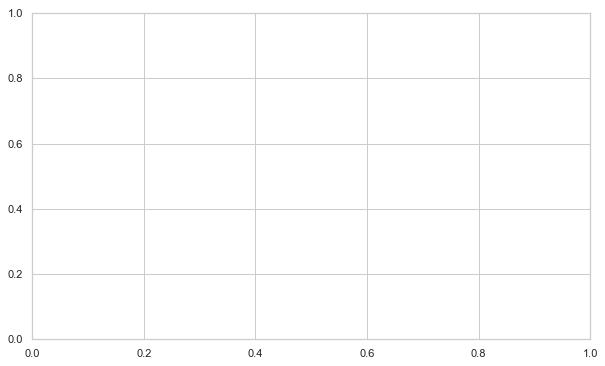

In [327]:
# set a variable that will call whatever column we want to visualise on the map
variable = map_df["IV"]
# set the range for the choropleth
vmin, vmax = 1, 20
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

TypeError: object of type 'float' has no len()

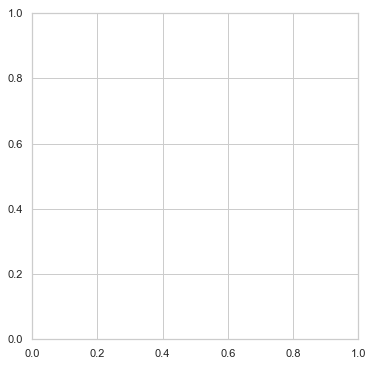

/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:393: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)


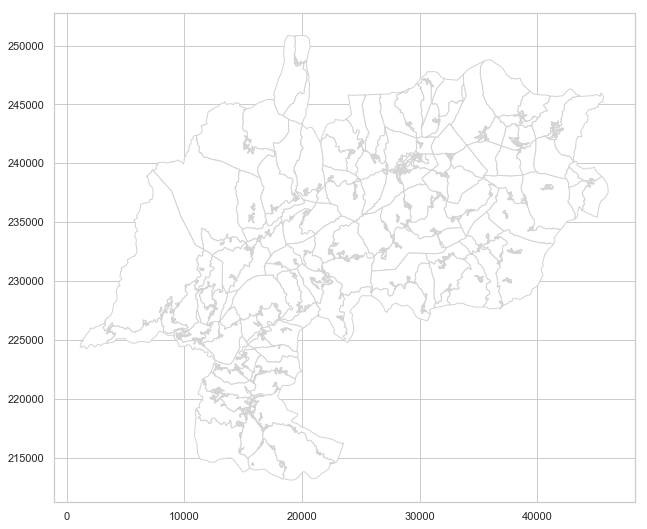

In [334]:
ax0 = map_df.plot(column='IV', color='white', edgecolor='lightgrey', figsize=(11,9))

In [336]:
RRR = map_df.plot(ax=ax0, column='IV', cmap='Blues',
                      k=10, legend=True, legend_kwds={"loc": 3}, edgecolor='lightgrey')

<Figure size 432x288 with 0 Axes>

In [204]:
type(df.index)

pandas.core.indexes.range.RangeIndex

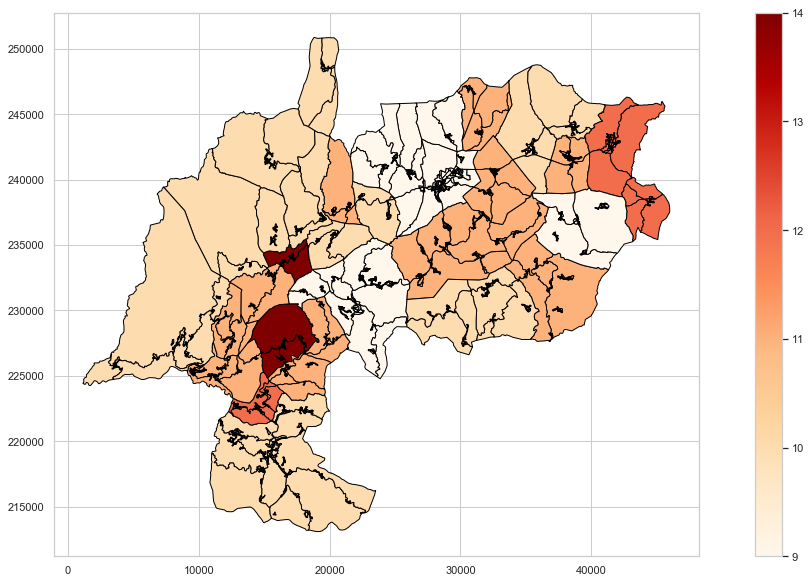

In [343]:
map_df.plot(column='IV', figsize=(20,10), cmap='OrRd', legend=True, edgecolor='black');

In [208]:
cities.plot(ax=base, marker='o', color='red', markersize=5);

In [209]:
import pandas as pd
import folium


folium_map = folium.Map(location=[41.785061, -7.781880],
                        zoom_start=10,
                        tiles="CartoDB dark_matter")

folium.CircleMarker(location=[41.714849, -8.034901],color='pink', radius=3).add_to(folium_map)#Centro Social e Paroquial de Cabril
folium.CircleMarker(location=[41.855523, -7.633986],color='red', radius=1).add_to(folium_map) #Centro Social e Paroquial de Vilar de Perdizes
folium.CircleMarker(location=[41.798622, -7.666606],color='grey', radius=3.7).add_to(folium_map) #Lar Monte Sereno
folium.CircleMarker(location=[41.641292, -7.945080],color='yellow', radius=3).add_to(folium_map) #Lar Nossa Senhora do Pranto
folium.CircleMarker(location=[41.737331, -7.869785],color='orange', radius=2.2).add_to(folium_map) #Lar dos Pisões para Seniores
folium.CircleMarker(location=[41.822516, -7.790499],color='green', radius=8).add_to(folium_map) #Santa Casa da Misericórdia - Lar
folium.CircleMarker(location=[41.785061, -7.781880],color='blue', radius=3.6).add_to(folium_map) #Residencial Santa Clara


folium_map

In [65]:
import pandas as pd
df1 = pd.read_csv("/Users/dvf/Desktop/IndiceVulnerabilidadeMontalegre.csv", header=0, sep=";", encoding = "ISO-8859-1") 
#tive que mudar encoding
df1.head()

,Freguesia,IV
0,170601,10
1,170602,10
2,170603,11
3,170604,11
4,170605,10


In [66]:
map_df.crs

{'init': 'epsg:3763'}

In [26]:
df

,ANO,GEO_COD,GEO_COD_DSG,NIVEL,NIVEL_DSG,N_EDIFICIOS_CLASSICOS,N_EDIFICIOS_CLASSICOS_1OU2,N_EDIFICIOS_CLASSICOS_ISOLADOS,N_EDIFICIOS_CLASSICOS_GEMIN,N_EDIFICIOS_CLASSICOS_EMBANDA,...,N_IND_RESID_DESEMP_PROC_EMPRG,N_IND_RESID_EMPREGADOS,N_IND_RESID_PENS_REFORM,N_IND_RESID_SEM_ACT_ECON,N_IND_RESID_EMPREG_SECT_PRIM,N_IND_RESID_EMPREG_SECT_SEQ,N_IND_RESID_EMPREG_SECT_TERC,N_IND_RESID_ESTUD_MUN_RESID,N_IND_RESID_TRAB_MUN_RESID,Unnamed: 127
0,2011,'PT,PT,1,Total Nacional,3544389,3219791,1946604,542393,730794,...,539870,4361187,2339094,3966482,133386,1154709,3073092,1773245,2860521,NaN
1,2011,'1,Continente,2,NUT1,3353610,3035969,1820486,516785,698698,...,515712,4150252,2257145,3782538,121055,1115357,2913840,1669455,2697144,NaN
2,2011,'11,Norte,3,NUT2,1209911,1118014,744666,200722,172626,...,207538,1501883,768566,1376384,43023,533848,925012,631487,1008020,NaN
3,2011,'118,Alto Trás-os-Montes,4,NUT3,127220,123194,66466,26515,30213,...,6669,68441,63100,103862,7725,13567,47149,29828,58694,NaN
4,2011,'1706,Montalegre,5,Municipio,10157,10036,5656,2176,2204,...,246,3098,3866,6049,692,604,1802,1235,2741,NaN
5,2011,'170601,Cabril,6,Freguesia,433,431,301,130,0,...,11,146,222,337,31,50,65,73,107,NaN
6,2011,'170602,Cambeses do Rio,6,Freguesia,154,154,45,0,109,...,2,34,64,83,14,2,18,11,34,NaN
7,2011,'170603,Cervos,6,Freguesia,280,280,176,20,84,...,13,91,96,140,29,21,41,23,79,NaN
8,2011,'170604,Chã,6,Freguesia,751,741,447,84,210,...,27,240,206,367,71,50,119,117,223,NaN
9,2011,'170605,Contim,6,Freguesia,139,139,84,41,14,...,2,22,33,56,14,3,5,8,21,NaN


In [67]:
df1

,Freguesia,IV
0,170601,10
1,170602,10
2,170603,11
3,170604,11
4,170605,10
5,170606,10
6,170607,11
7,170608,9
8,170609,11
9,170610,9


In [92]:
#df_new = pd.concat([df, df1], sort=False)
#df_new

In [116]:
merged["Freguesia"] = merged["DTMN11"].map(str) + merged["FR11"]


In [118]:
df4 = map_df(map_df.drop(columns='DTMN11'))

TypeError: 'GeoDataFrame' object is not callable

In [119]:
def read_shapefile(sf):
    #fetching the headings from the shape file
    fields = [x[0] for x in sf.fields][1:]
#fetching the records from the shape file
    records = [list(i) for i in sf.records()]
    shps = [s.points for s in sf.shapes()]
#converting shapefile data into pandas dataframe
    df5 = pd.DataFrame(columns=fields, data=records)
#assigning the coordinates
    df5 = df.assign(coords=shps)
    return df5

In [101]:
map_df.head()

,DTMN11,FR11,SEC11,SS11,BGRI11,LUG11,LUG11DESIG,geometry
0,1706,34,002,38,17063400238,999999,Residual,"POLYGON ((26131.41889999993 232084.4857000001,..."
1,1706,25,001,15,17062500115,014045,Ladrugães,"POLYGON ((17805.88310000021 228000.6173999999,..."
2,1706,26,001,42,17062600142,999999,Residual,"POLYGON ((16606.63999999966 223659.7104000002,..."
3,1706,12,001,31,17061200131,999999,Residual,"POLYGON ((35531.56340000033 242104.0514000002,..."
4,1706,08,001,08,17060800108,013976,Donões,"POLYGON ((26191.65440000035 240495.8397000004,..."


In [102]:
map_df.type


0       Polygon
1       Polygon
2       Polygon
3       Polygon
4       Polygon
5       Polygon
6       Polygon
7       Polygon
8       Polygon
9       Polygon
10      Polygon
11      Polygon
12      Polygon
13      Polygon
14      Polygon
15      Polygon
16      Polygon
17      Polygon
18      Polygon
19      Polygon
20      Polygon
21      Polygon
22      Polygon
23      Polygon
24      Polygon
25      Polygon
26      Polygon
27      Polygon
28      Polygon
29      Polygon
         ...   
1387    Polygon
1388    Polygon
1389    Polygon
1390    Polygon
1391    Polygon
1392    Polygon
1393    Polygon
1394    Polygon
1395    Polygon
1396    Polygon
1397    Polygon
1398    Polygon
1399    Polygon
1400    Polygon
1401    Polygon
1402    Polygon
1403    Polygon
1404    Polygon
1405    Polygon
1406    Polygon
1407    Polygon
1408    Polygon
1409    Polygon
1410    Polygon
1411    Polygon
1412    Polygon
1413    Polygon
1414    Polygon
1415    Polygon
1416    Polygon
Length: 1417, dtype: obj